In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipynb.fs.defs.distance import away_or_home

In [2]:
game_id = "0042100301"
# I generated this file in distance.ipynb
e_t_df= pd.read_csv(f"./games/{game_id}/{game_id}_e_t.csv", index_col=0) # events and tracking csv
shots = e_t_df.loc[e_t_df['eventType'] == "SHOT"]

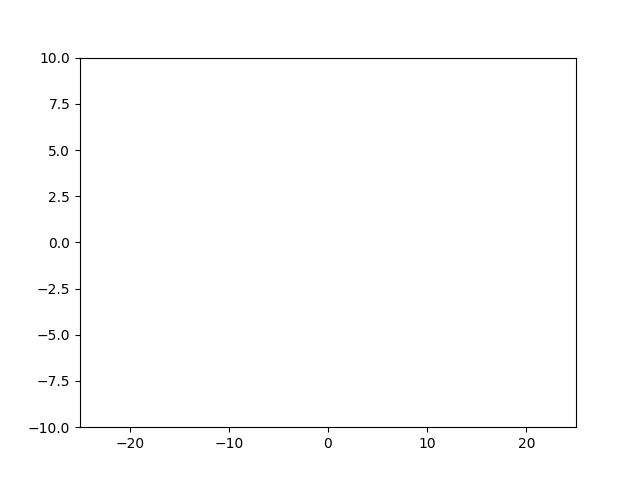

In [3]:
fig, ax = plt.subplots()
ax.set_xlim((-25,25))
ax.set_ylim((-10,10))

def plot_players(i):
    ax.clear()
    row = e_t_df.iloc[i]
    # print(f"row index: {row.name} {type(row)}")
    home_coords = [x['xyz'] for x in eval(row['homePlayers_tracking'])]
    away_coords = [x['xyz'] for x in eval(row['awayPlayers_tracking'])]
    ball_coords = eval(row['ball'])
    off_team = away_or_home(row)
    for h in home_coords:
        color = 'red' if off_team == 'home' else 'gray'
        ax.plot(h[0], h[1],marker='x', color=color)
    for a in away_coords:
        color = 'red' if off_team == 'away' else 'gray'
        ax.plot(a[0], a[1],marker='x', color=color)
    ax.plot(ball_coords[0],ball_coords[1], marker='o', color='orange')

ani = FuncAnimation(fig,plot_players,frames=10)
plt.show()

